In [1]:
# Static inline plots
# %matplotlib inline

# External qt plots
# %matplotlib qt

# Interactive plots
%matplotlib notebook

import pandas as pd
import numpy as np
import scipy.signal
from scipy.io import loadmat
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
# This is a matlabe read of "converted_20200213_FM_fillet_repeat_sample_B_33.ics"
x = loadmat('../data/TomraData/day2/20200213_120111_FM_fillet_repeat_sample_B_33.mat')
data = np.array(x['image'])
# The spectraband indexes
index = np.array([928, 932, 935, 939, 942, 946, 950, 953, 957, 960, 964, 968, 971, 975, 978, 982, 986, 989, 993, 997, 1000, 1004, 1007, 1011, 1015, 1018, 1022, 1025, 1029, 1033, 1036, 1040, 1043, 1047, 1051, 1054, 1058, 1061, 1065, 1069, 1072, 1076, 1079, 1083, 1087, 1090, 1094, 1097, 1101, 1105, 1108, 1112, 1115, 1119, 1123, 1126, 1130, 1134, 1137, 1141, 1144, 1148, 1152, 1155, 1159, 1162, 1166, 1170, 1173, 1177, 1180, 1184, 1188, 1191, 1195, 1198, 1202, 1206, 1209, 1213, 1216, 1220, 1224, 1227, 1231, 1234, 1238, 1242, 1245, 1249, 1252, 1256, 1260, 1263, 1267, 1271, 1274, 1278, 1281, 1285, 1289, 1292, 1296, 1299, 1303, 1307, 1310, 1314, 1317, 1321, 1325, 1328, 1332, 1335, 1339, 1343, 1346, 1350, 1353, 1357, 1361, 1364, 1368, 1371, 1375, 1379, 1382, 1386, 1390, 1393, 1397, 1400, 1404, 1408, 1411, 1415, 1418, 1422, 1426, 1429, 1433, 1436, 1440, 1444, 1447, 1451, 1454, 1458, 1462, 1465, 1469, 1472, 1476, 1480, 1483, 1487, 1490, 1494, 1498, 1501, 1505, 1508, 1512, 1516, 1519, 1523, 1527, 1530, 1534, 1537, 1541, 1545, 1548, 1552, 1555, 1559, 1563, 1566, 1570, 1573, 1577, 1581, 1584, 1588, 1591, 1595, 1599, 1602, 1606, 1609, 1613, 1617, 1620, 1624, 1627, 1631, 1635, 1638, 1642, 1645, 1649, 1653, 1656, 1660, 1664, 1667, 1671, 1674])

In [3]:
def extract_spectra(x_min, x_max, y_min, y_max, data, mean=True):
    ''' Python indexes by (y, x), which is strange.. '''
    spectral_cube = data[x_min:x_max+1, y_min:y_max+1, :]
    if mean:
        return np.squeeze(spectral_cube.mean(axis=(0,1)))
    else:
        return spectral_cube

In [11]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
print(kmeans.labels_)
print(kmeans.predict([[0, 0], [12, 3]]))
print(kmeans.cluster_centers_)

[1 1 1 0 0 0]
[1 0]
[[10.  2.]
 [ 1.  2.]]


<IPython.core.display.Javascript object>


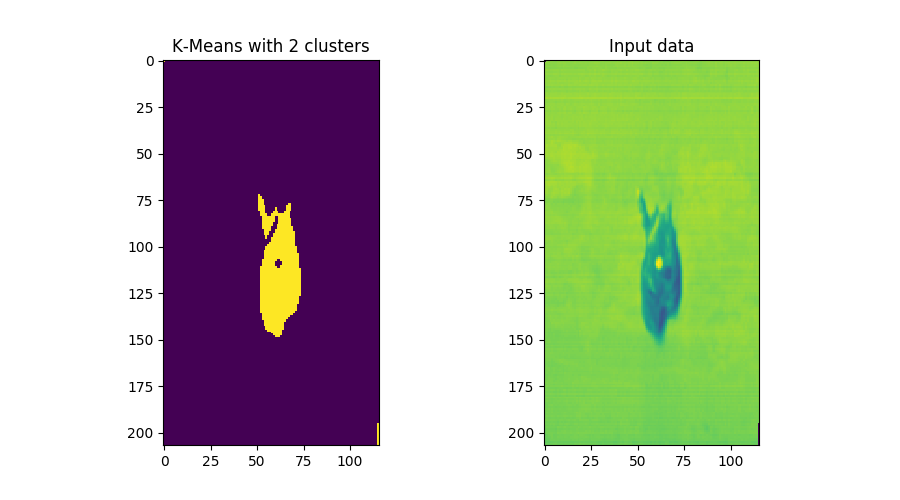

<IPython.core.display.Javascript object>


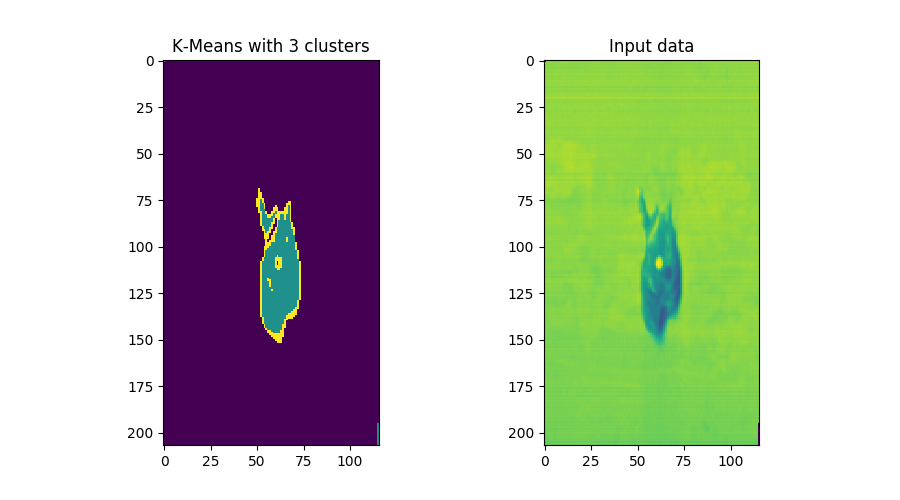

<IPython.core.display.Javascript object>


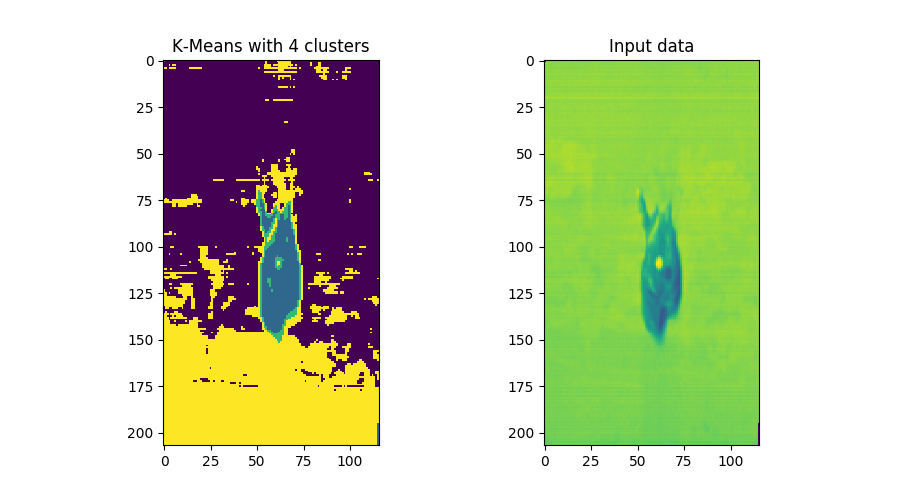

<IPython.core.display.Javascript object>


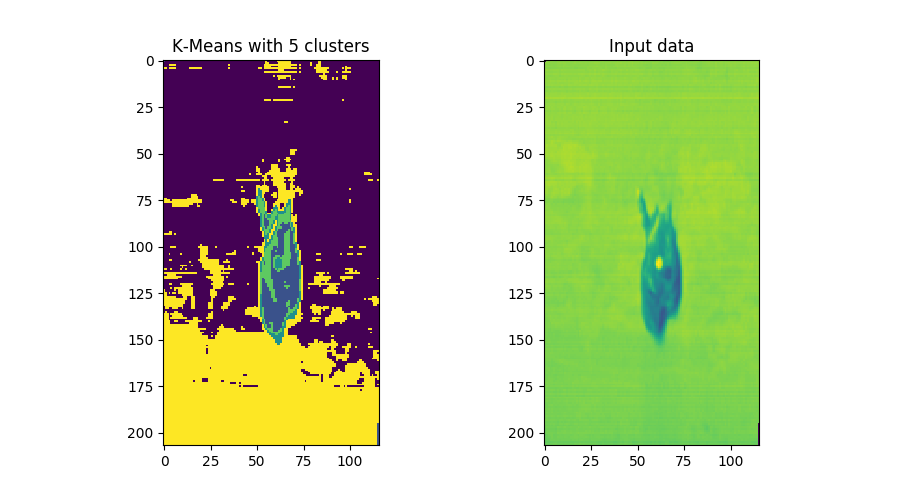

<IPython.core.display.Javascript object>


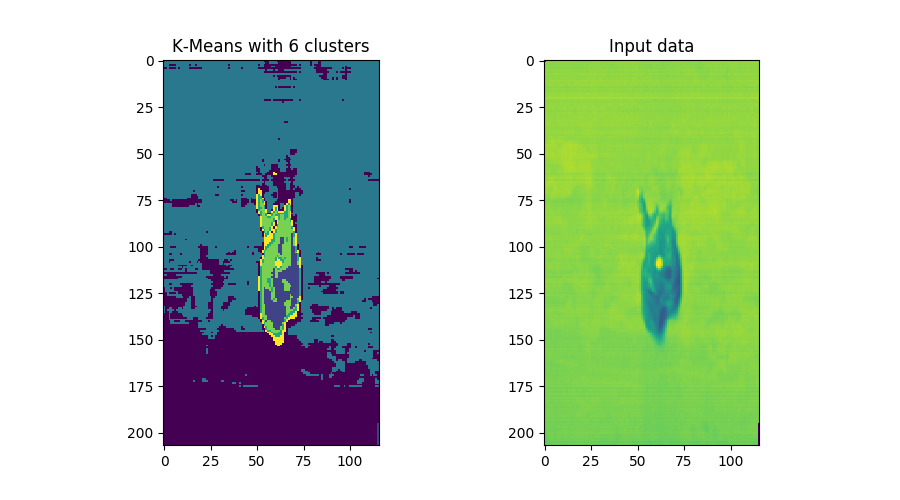

In [33]:
X = data #[:, :, 50:52]
n, m, k = X.shape
X = X.reshape(n*m, k)
for n_clusters in range(2, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    out = kmeans.predict(X).reshape(n, m)

    fig = plt.figure(figsize=(9, 5))
    plt.subplot(121)
    plt.title(f"K-Means with {n_clusters} clusters")
    plt.imshow(out)
    plt.subplot(122)
    plt.title("Input data")
    plt.imshow(data[:, :, 50])

<IPython.core.display.Javascript object>


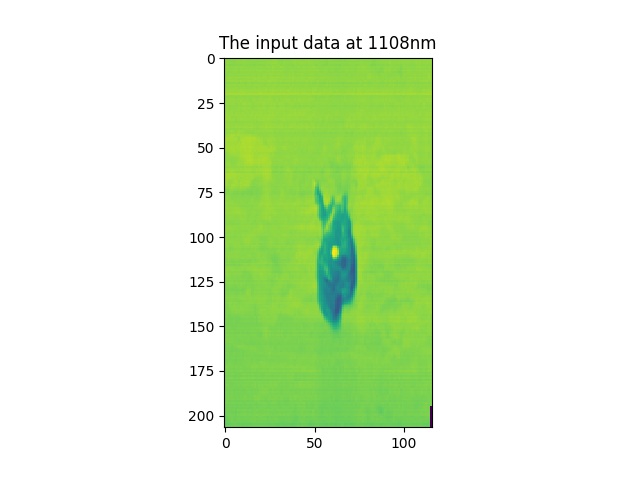

In [13]:
plt.figure()
i = 50
plt.title(f"The input data at {index[i]}nm")
plt.imshow(np.squeeze(data[:, :, i]))

In [9]:
button   = extract_spectra(108,110, 60,62, data)
blueBelt = extract_spectra(112,117, 65,68, data)
darkMeat = extract_spectra(128,143, 55,63, data)
backgroundBelt = extract_spectra(10,70, 80,110, data)

<IPython.core.display.Javascript object>


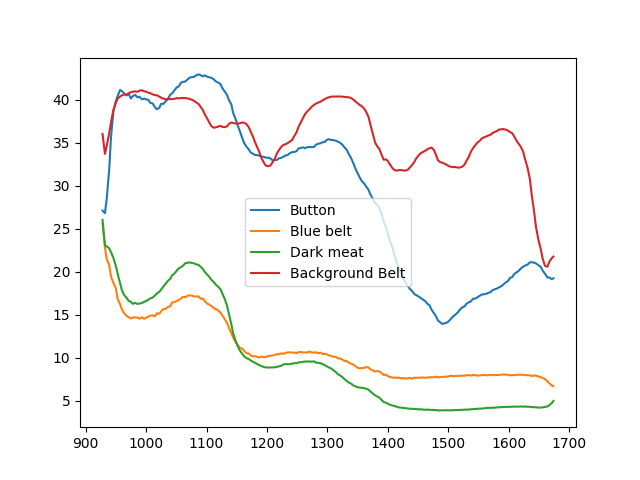

In [34]:
plt.figure()
ax = plt.plot(index, button, label='Button')
plt.plot(index, blueBelt, label='Blue belt')
plt.plot(index, darkMeat, label='Dark meat')
plt.plot(index, backgroundBelt, label='Background Belt')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


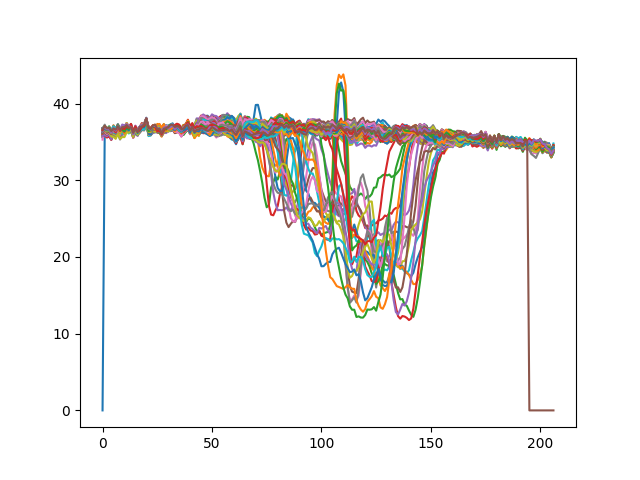

In [14]:
plt.figure()
plt.plot(np.squeeze(data[:, :, 50]));

<IPython.core.display.Javascript object>


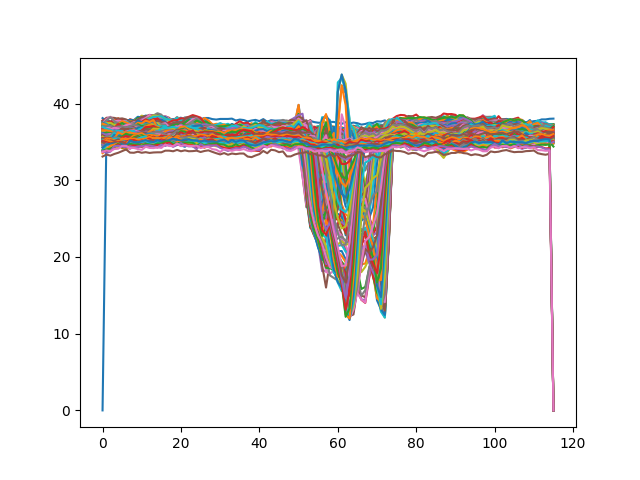

In [10]:
plt.figure()
plt.plot(np.squeeze(data[:, :, 50]).T);

<IPython.core.display.Javascript object>


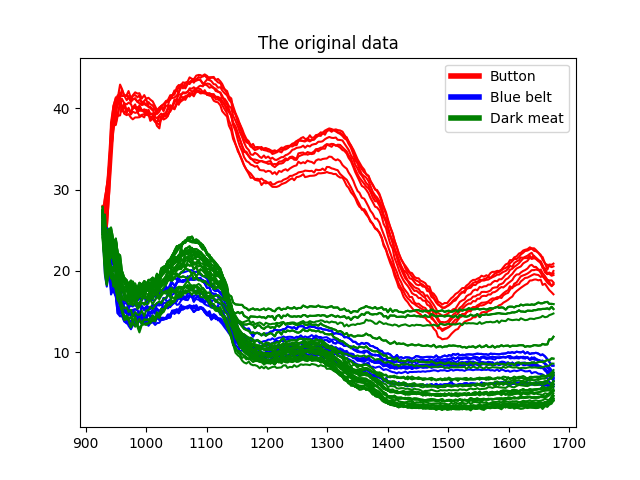

<IPython.core.display.Javascript object>


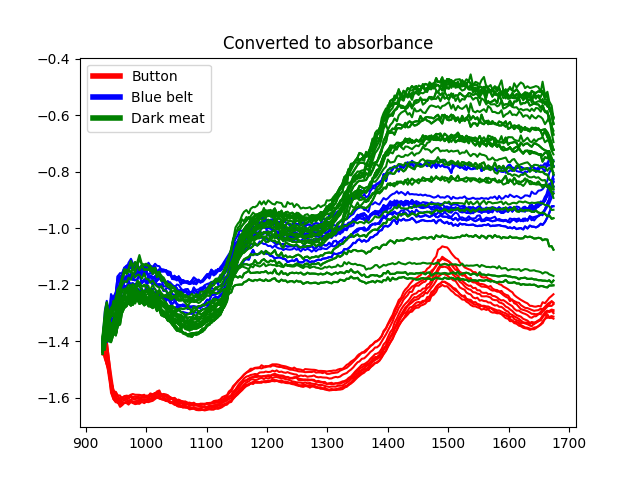

In [18]:
button_pixels   = extract_spectra(108,110, 60,62, data, mean=False)
blueBelt_pixels = extract_spectra(112,117, 65,68, data, mean=False)
darkMeat_pixels = extract_spectra(128,143, 55,63, data, mean=False)

def iter_index(count, shape):
    # np.iterindex
    x, y = shape
#     count = i + j + 1
    i = count // shape[0]
    j = count % shape[1]
    
    if (i == 2 and j == 2):
        end = True
    else:
        end = False
    return i, j, end
    
def add_all_pixels_to_plot(data, color='r'):
    shape = data.shape[0:2]
    count, end = 0, False
    while not end:
        # Do stuff..
        i, j, end = iter_index(count, shape)
        count += 1

        plt.plot(index, np.squeeze(data[i, j, :]), color)
    
#################################################
fig = plt.figure()
plt.title("The original data")
add_all_pixels_to_plot(button_pixels, color='r')
add_all_pixels_to_plot(blueBelt_pixels, color='b')
add_all_pixels_to_plot(darkMeat_pixels, color='g')

ax = fig.axes[0]
ax.legend([Line2D([0], [0], color='Red', lw=4),
           Line2D([0], [0], color='Blue', lw=4),
           Line2D([0], [0], color='Green', lw=4)], ['Button', 'Blue belt', 'Dark meat']);

##################################################
fig = plt.figure()
plt.title("Converted to absorbance")
constant = 1
add_all_pixels_to_plot(np.log10(constant/button_pixels), color='r')
add_all_pixels_to_plot(np.log10(constant/blueBelt_pixels), color='b')
add_all_pixels_to_plot(np.log10(constant/darkMeat_pixels), color='g')

ax = fig.axes[0]
ax.legend([Line2D([0], [0], color='Red', lw=4),
           Line2D([0], [0], color='Blue', lw=4),
           Line2D([0], [0], color='Green', lw=4)], ['Button', 'Blue belt', 'Dark meat']);

<IPython.core.display.Javascript object>


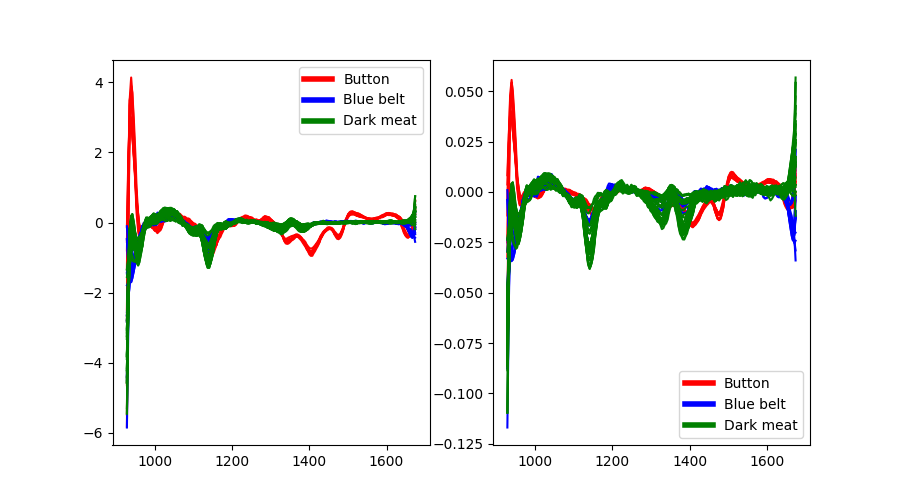

In [25]:
def add_diff_of_all_pixels_to_plot(data, color='r'):
    w, p = 21, 6
    shape = data.shape[0:2]
    count, end = 0, False
    while not end:
        # Do stuff..
        i, j, end = iter_index(count, shape)
        count += 1

        signal_diff = scipy.signal.savgol_filter(np.squeeze(data[i, j, :]), window_length=w, polyorder = p, deriv=1)
        plt.plot(index, signal_diff, color)
        
def plot_stuff(button_pixels, blueBelt_pixels, darkMeat_pixels, i):
    add_diff_of_all_pixels_to_plot(button_pixels, color='r')
    add_diff_of_all_pixels_to_plot(blueBelt_pixels, color='b')
    add_diff_of_all_pixels_to_plot(darkMeat_pixels, color='g')

    ax = fig.axes[i]
    ax.legend([Line2D([0], [0], color='Red', lw=4),
               Line2D([0], [0], color='Blue', lw=4),
               Line2D([0], [0], color='Green', lw=4)], ['Button', 'Blue belt', 'Dark meat']);

# fig = plt.figure()
fig = plt.figure(figsize=(9, 5))
plt.subplot(121)
plot_stuff(button_pixels, blueBelt_pixels, darkMeat_pixels, 0)
plt.subplot(122)
plot_stuff(*(np.log10(x) for x in (button_pixels, blueBelt_pixels, darkMeat_pixels)), 1)